# SyriaTel Customer Churn Prediction Model 

Author: Endalkachew Dessalegne

## 1. Project Overview 

This project focuses on building a classifier model to predict whether a customer will ("soon") stop doing business with SyriaTel, a telecommunications company. The company is interested in reducing the money lost because of customers who don't stick around very long. Which factors contribute most to customers churn? are there any predictable patterns in the dataset? 
which model can better predict customers who will churn? 
What correctve action can the company take to reduce number of customers who churn? 

## 1.1. Business Understanding

### 1.1.1. Business Problem

### 1.1.2. Key Business Questions 
* Which factors contribute most to customers churn?
* are there any predictable patterns in the dataset?
* which model can better predict customers who will churn?
* can this predictive model improved
* What correctve action can the company take to reduce number of customers who churn? 



## 2. Data Understanding and Preparation

### 2.1. Data Understanding 
The dataset for this project is obtained from .. website. It consists of 3333 rows, each refers to a customer of a telecom company, and 21 columns, which show different features of customers in the their use of the telecome service. The 'churn' column is the target column where there are two classes of customers, 'True' for customers who stopped doing business with the company and 'False' for customers whe are still doing businss with the company.

### 2.1.1. The Data 

In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy import stats

In [3]:
df = pd.read_csv("SyriaTel_Customer_Churn.csv") 
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.shape

(3333, 21)

Cheking null values in the dataset

In [5]:
# Checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

Looking at distribusion of our target classes:

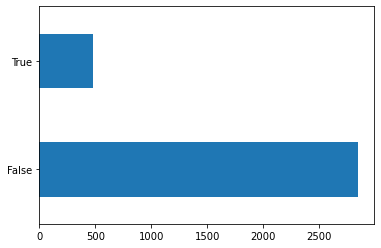

Class distribution : 
 False    2850
True      483
Name: churn, dtype: int64


In [6]:
df['churn'].value_counts().plot.barh()
plt.show()
print(f"Class distribution : \n {df['churn'].value_counts()}")

### 2.1.2. Defining Target Variable and Data Train-Test split

The tagret variable, y, is the 'churn' column and all other features are independent variables, X.

In [7]:
# change the bool datatype of churn into values of 0 and 1
df['churn'] = df['churn'].astype(int) 

In [8]:
# asign y to the target variable and X to independent variables
y = df["churn"] 
X = df.drop("churn", axis=1) 

In [9]:
# split the data to train and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## 3. Data Preprocessing 

### 3.1. Dealing with Missing Data

In [264]:
# check for missing data in the X_train set
X_train.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
dtype: int64

* There are no missing data in the X_train dataset

In [265]:
# get list of all columns in X_train
X_train.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')

* There are some columns or features which are not important in influencing the customers' decision to churn or not.
* These include 'state', 'area code' and 'phone number'. Therefore, these columns are droped.

In [266]:
# drop not relevant columns
features_to_drop = ['state', 'area code', 'phone number']
X_train = X_train.drop(features_to_drop, axis=1) 
print(X_train.shape)
X_train.head(2)


(2499, 17)


,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
427,67,no,yes,40,104.9,65,17.83,216.3,93,18.39,217.4,128,9.78,9.6,9,2.59,1
1656,101,no,yes,28,105.9,132,18.00,231.7,107,19.69,281.3,120,12.66,10.7,5,2.89,1


* Now 18 relevant columns to work with.

### 3.2. Dealing with Categorical Data

In [267]:
# Categorical data(i.e Dtype object) are dealt as X_train_categorical variable 
X_train_categorical = X_train.select_dtypes(include=['object']).copy()
X_train_categorical

,international plan,voice mail plan
427,no,yes
1656,no,yes
1042,yes,yes
1867,yes,yes
346,no,yes
...,...,...
835,no,no
3264,no,yes
1653,yes,no
2607,no,no


* Categorical variables are converted into dummy one-hot encoded variables 
* OneHotEncoder from scikit-learn is used

In [268]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

ohe.fit(X_train_categorical)

X_train_ohe = pd.DataFrame(
    ohe.transform(X_train_categorical),
    # index is important to ensure we can concatenate with other columns
    index=X_train_categorical.index,
    # we are dummying multiple columns at once, so stack the names
    columns=np.hstack(ohe.categories_)
)
X_train_ohe

,no,yes,no,yes
427,1.0,0.0,0.0,1.0
1656,1.0,0.0,0.0,1.0
1042,0.0,1.0,0.0,1.0
1867,0.0,1.0,0.0,1.0
346,1.0,0.0,0.0,1.0
...,...,...,...,...
835,1.0,0.0,1.0,0.0
3264,1.0,0.0,0.0,1.0
1653,0.0,1.0,1.0,0.0
2607,1.0,0.0,1.0,0.0


### 3.3. Normalization of data 
* The numeric features of the data are not on the same scale.
* All features are normalized to a consistent scale of 0 to 1

In [269]:
# first asign  X_train_numeric variable to numeric features of X_train 
X_train_numeric = X_train.select_dtypes(include=['int64', 'float']).copy()
X_train_numeric

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
427,67,40,104.9,65,17.83,216.3,93,18.39,217.4,128,9.78,9.6,9,2.59,1
1656,101,28,105.9,132,18.00,231.7,107,19.69,281.3,120,12.66,10.7,5,2.89,1
1042,91,24,93.5,112,15.90,183.4,128,15.59,240.7,133,10.83,9.9,3,2.67,0
1867,142,25,191.1,109,32.49,149.6,120,12.72,227.8,60,10.25,9.8,3,2.65,0
346,81,33,161.6,117,27.47,123.0,90,10.46,261.3,101,11.76,12.2,5,3.29,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,27,0,72.7,75,12.36,208.6,117,17.73,65.8,71,2.96,9.9,3,2.67,1
3264,89,24,97.8,98,16.63,207.2,67,17.61,214.5,126,9.65,5.9,2,1.59,0
1653,93,0,131.4,78,22.34,219.7,106,18.67,155.7,103,7.01,11.1,2,3.00,1
2607,91,0,189.3,100,32.18,239.3,107,20.34,89.7,89,4.04,9.9,3,2.67,3


In [270]:
# MinMaxScaler is used to scale all features 
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler() 
scaler.fit(X_train_numeric) 
X_train_scaled = pd.DataFrame(
    scaler.transform(X_train_numeric), 
    index=X_train_numeric.index, 
    columns=X_train_numeric.columns
) 
X_train_scaled

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
427,0.285714,0.784314,0.299031,0.393939,0.298960,0.594721,0.547059,0.594953,0.522324,0.725191,0.522415,0.480,0.45,0.479630,0.111111
1656,0.432900,0.549020,0.301881,0.800000,0.301811,0.637064,0.629412,0.637011,0.694190,0.664122,0.694561,0.535,0.25,0.535185,0.111111
1042,0.389610,0.470588,0.266534,0.678788,0.266600,0.504262,0.752941,0.504368,0.584992,0.763359,0.585176,0.495,0.15,0.494444,0.000000
1867,0.610390,0.490196,0.544755,0.660606,0.544769,0.411328,0.705882,0.411517,0.550296,0.206107,0.550508,0.490,0.15,0.490741,0.000000
346,0.346320,0.647059,0.460661,0.709091,0.460597,0.338191,0.529412,0.338402,0.640398,0.519084,0.640765,0.610,0.25,0.609259,0.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,0.112554,0.000000,0.207241,0.454545,0.207243,0.573550,0.688235,0.573601,0.114578,0.290076,0.114764,0.495,0.15,0.494444,0.111111
3264,0.380952,0.470588,0.278791,0.593939,0.278840,0.569700,0.394118,0.569719,0.514524,0.709924,0.514644,0.295,0.10,0.294444,0.000000
1653,0.398268,0.000000,0.374572,0.472727,0.374581,0.604069,0.623529,0.604012,0.356374,0.534351,0.356844,0.555,0.10,0.555556,0.111111
2607,0.389610,0.000000,0.539624,0.606061,0.539571,0.657960,0.629412,0.658039,0.178860,0.427481,0.179319,0.495,0.15,0.494444,0.333333


* I concatenate X_train_ohe and X_train_scaled together.

In [271]:
X_train_all = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_train_all

,no,yes,no,yes,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
427,1.0,0.0,0.0,1.0,0.285714,0.784314,0.299031,0.393939,0.298960,0.594721,0.547059,0.594953,0.522324,0.725191,0.522415,0.480,0.45,0.479630,0.111111
1656,1.0,0.0,0.0,1.0,0.432900,0.549020,0.301881,0.800000,0.301811,0.637064,0.629412,0.637011,0.694190,0.664122,0.694561,0.535,0.25,0.535185,0.111111
1042,0.0,1.0,0.0,1.0,0.389610,0.470588,0.266534,0.678788,0.266600,0.504262,0.752941,0.504368,0.584992,0.763359,0.585176,0.495,0.15,0.494444,0.000000
1867,0.0,1.0,0.0,1.0,0.610390,0.490196,0.544755,0.660606,0.544769,0.411328,0.705882,0.411517,0.550296,0.206107,0.550508,0.490,0.15,0.490741,0.000000
346,1.0,0.0,0.0,1.0,0.346320,0.647059,0.460661,0.709091,0.460597,0.338191,0.529412,0.338402,0.640398,0.519084,0.640765,0.610,0.25,0.609259,0.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,1.0,0.0,1.0,0.0,0.112554,0.000000,0.207241,0.454545,0.207243,0.573550,0.688235,0.573601,0.114578,0.290076,0.114764,0.495,0.15,0.494444,0.111111
3264,1.0,0.0,0.0,1.0,0.380952,0.470588,0.278791,0.593939,0.278840,0.569700,0.394118,0.569719,0.514524,0.709924,0.514644,0.295,0.10,0.294444,0.000000
1653,0.0,1.0,1.0,0.0,0.398268,0.000000,0.374572,0.472727,0.374581,0.604069,0.623529,0.604012,0.356374,0.534351,0.356844,0.555,0.10,0.555556,0.111111
2607,1.0,0.0,1.0,0.0,0.389610,0.000000,0.539624,0.606061,0.539571,0.657960,0.629412,0.658039,0.178860,0.427481,0.179319,0.495,0.15,0.494444,0.333333
